Here we estimate the contribution from finite emittance of an electron bunch.
At first, we write trajectory equations.

In [40]:
from sympy import*
from sympy import plot
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
init_printing()

f = lambda eta, x : (3/(8*np.sqrt(np.pi)))*(sin(x/2 + eta**2/4) / (x/2 + eta**2/4))**2
#y, err = integrate.quad(f, -10, 10, args=(0,))

C = np.linspace(-30, 15, 200)
Integral = []
for c in C:
    y, err = integrate.quad(f, -30, 30, args=(c,))
    Integral.append(y)


/home/andrei/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [1]:
def Inten(C, theta):
    return (np.sin(C/2)/(C/2))**2

#C = np.arange(-6.5,6.5, 0.1)
theta = 0
#for i in range(len(Integral)):
#    Integral[i] = Integral[i]*(3/(8*np.sqrt(3.14)))
plt.figure(figsize=(1.5*4,1.5*3))
#plt.plot(C, Integral, color='black', label='1')
plt.plot(C, Inten(C, theta), color='blue', linestyle='--', label='2')
        
plt.xlabel(r'$\hat{C} + \hat{\theta}^2_y/2$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.92, -0.03)
ax.yaxis.set_label_coords(-0.03, 0.98)

# Change to location of the legend. 

plt.xlim(-30, 15)
plt.ylim(0, 1.1)
plt.tight_layout()

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.2
bb.x0 += 0.1
bb.x1 += 0.01
bb.y0 += 0.
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
    

plt.xticks([-30, -25, -20, -15, -10, -5, 0, 5],fontsize=12)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2,0.4,0.6,0.8,1.0], fontsize=12)
        #  [r'$-1$', r'$0$', r'$+1$'])

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', alpha=0.1, edgecolor='white'), )

    
plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/spec_integ_emittance.pdf')#, bbox_inches='tight')
plt.show()  

NameError: name 'plt' is not defined

In [2]:
v_x, v_y, v_z, x, y, z = symbols('v_x, v_y, v_z, x , y, z')
c, K, gamma, k_w= symbols('c, K, gamma, k_w', nonzero=True)
z_0, z_1, s = symbols('z_0, z_1, s')
eta_x, eta_y  = symbols('eta_x, eta_y ')
l_x, l_y = symbols('l_x, l_y')

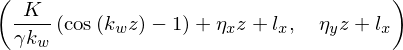

In [3]:
v_x = -(c*K/gamma)*sin(k_w*z) + eta_x*v_z
v_y = eta_y*v_z

x = (K/gamma/k_w)*(cos(k_w*z) - 1) + eta_x*z + l_x
y = eta_y*z + l_x
x, y

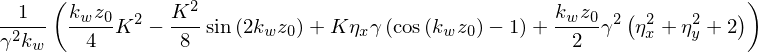

In [4]:
s = integrate(1 + diff((x), z)**2/2 + diff((y), z)**2/2, (z, 0, z_0))
#s = Integral(1 + 0.5*diff((x), z_0)**2 + 0.5*diff((y), z_0)**2, (z_0, 0, z_1))
s
simplify(s)


In [9]:
print(s)

K**2*z_0*sin(k_w*z_0)**2/(4*gamma**2) + K**2*z_0*cos(k_w*z_0)**2/(4*gamma**2) - K**2*sin(k_w*z_0)*cos(k_w*z_0)/(4*gamma**2*k_w) + K*eta_x*cos(k_w*z_0)/(gamma*k_w) - K*eta_x/(gamma*k_w) + eta_x**2*z_0/2 + eta_y**2*z_0/2 + z_0


Here I define a new parameter: $\cfrac{\beta_{avr}}{\beta} = 1 - \cfrac{K^2}{4\gamma^2}$

In [5]:
beta, beta_avr = symbols('beta, beta_avr')

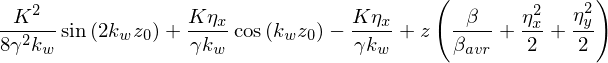

In [6]:
s = ((beta/beta_avr + (eta_x**2+ eta_y**2)/2)*z - 
    K*eta_x/(gamma*k_w) + K**2*sin(2*k_w*z_0)/(8*gamma**2*k_w) + 
    K*eta_x*cos(k_w*z_0)/(gamma*k_w)) 
s

Now, we obtained the expression for the abscissa of the trajectory. I am going to substitute it to the field distribution. With help.

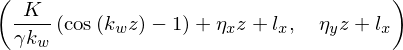

In [8]:
x, y 

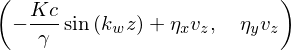

In [11]:
v_x, v_y

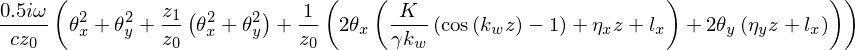

In [45]:
omega, z_0, theta_x, theta_y, z1 = symbols('omega, z_0, theta_x, theta_y, z1')
phi, phi1, phi2 = symbols('phi, phi1, phi2')
phi1 = 1j*omega/2/c/z_0 * ((theta_x**2 + theta_y**2) + 
                           2*(theta_x*x + theta_y*y)/z_0 + 
                           (theta_x**2 + theta_y**2)*z1/z_0)
phi1
#z1 := z^{prime}

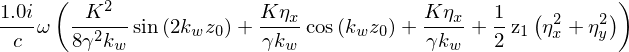

In [53]:
phi2 = 1j*(omega/c)*(z1(eta_x**2 + eta_y**2 )/2 + 
                K*eta_x/(gamma*k_w) + 
                K**2*sin(2*k_w*z_0)/(8*gamma**2*k_w) + 
                K*eta_x*cos(k_w*z_0)/(gamma*k_w))
phi2

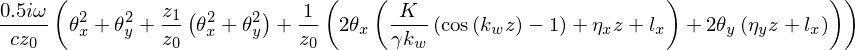

In [65]:
collect(phi1, z_1)

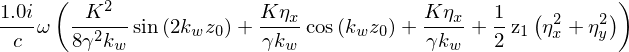

In [66]:
collect(phi2, z_1)